In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("F:\\Surveydata_train_(1).csv")

In [3]:
df.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [4]:
len(df)

94379

In [5]:
df1 = pd.read_csv("F:\\Traveldata_train_(1).csv")
df1.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [6]:
len(df1)

94379

In [7]:
final_df = pd.merge(df,df1,on='ID',how = 'left')
final_df

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,poor,Ordinary,good,good,Convinient,poor,poor,poor,...,good,poor,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0
94375,98894376,1,good,Ordinary,good,good,Convinient,need improvement,excellent,excellent,...,acceptable,good,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0
94376,98894377,1,need improvement,Green Car,need improvement,need improvement,need improvement,good,excellent,good,...,good,acceptable,Male,NaN,63.0,Business travel,Business,2794,0.0,0.0
94377,98894378,0,need improvement,Ordinary,NaN,need improvement,Convinient,good,need improvement,good,...,excellent,good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [9]:
final_df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [10]:
final_df['Seat_comfort'].unique()

array(['need improvement', 'poor', 'acceptable', 'good', 'excellent',
       'extremely poor', nan], dtype=object)

In [11]:
final_df['Seat_comfort'].mode()[0]

'acceptable'

In [12]:
final_df['Seat_comfort']=final_df['Seat_comfort'].fillna(final_df['Seat_comfort'].mode()[0])

In [13]:
final_df['Seat_comfort']=final_df['Seat_comfort'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [14]:
final_df['Arrival_time_convenient'].unique()

array(['excellent', 'need improvement', 'acceptable', nan, 'good', 'poor',
       'extremely poor'], dtype=object)

In [15]:
final_df['Arrival_time_convenient']=final_df['Arrival_time_convenient'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [16]:
final_df['Arrival_time_convenient']=final_df['Arrival_time_convenient'].fillna(final_df['Arrival_time_convenient'].mode()[0])

In [17]:
final_df['Catering'].unique()

array(['excellent', 'poor', 'need improvement', nan, 'acceptable', 'good',
       'extremely poor'], dtype=object)

In [18]:
final_df['Catering']=final_df['Catering'].fillna(final_df['Catering'].mode()[0])

In [19]:
final_df['Catering']=final_df['Catering'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [20]:
final_df['Platform_location'].unique()

array(['very convinient', 'need improvement', 'manageable',
       'Inconvinient', 'Convinient', nan, 'very inconvinient'],
      dtype=object)

In [21]:
final_df['Platform_location']=final_df['Platform_location'].fillna(final_df['Platform_location'].mode()[0])

In [22]:
final_df['Platform_location']=final_df['Platform_location'].map({'very inconvinient':0,'Inconvinient':1,'need improvement':2,'manageable':3,'Convinient':4,'very convinient':5})

In [23]:
final_df['Onboardwifi_service'].unique()

array(['good', 'need improvement', 'acceptable', 'excellent', 'poor',
       'extremely poor', nan], dtype=object)

In [24]:
final_df['Onboardwifi_service']=final_df['Onboardwifi_service'].fillna(final_df['Onboardwifi_service'].mode()[0])

In [25]:
final_df['Onboardwifi_service']=final_df['Onboardwifi_service'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [26]:
final_df['Onboard_entertainment'].unique()

array(['need improvement', 'poor', 'good', 'excellent', 'acceptable',
       'extremely poor', nan], dtype=object)

In [27]:
final_df['Onboard_entertainment']=final_df['Onboard_entertainment'].fillna(final_df['Onboard_entertainment'].mode()[0])

In [28]:
final_df['Onboard_entertainment']=final_df['Onboard_entertainment'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [29]:
final_df['Online_support'].unique()

array(['acceptable', 'good', 'excellent', 'poor', nan, 'need improvement',
       'extremely poor'], dtype=object)

In [30]:
final_df['Online_support']=final_df['Online_support'].fillna(final_df['Online_support'].mode()[0])

In [31]:
final_df['Online_support']=final_df['Online_support'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [32]:
final_df['Onlinebooking_Ease'].unique()

array(['need improvement', 'good', 'excellent', 'acceptable', 'poor', nan,
       'extremely poor'], dtype=object)

In [33]:
final_df['Onlinebooking_Ease']=final_df['Onlinebooking_Ease'].fillna(final_df['Onlinebooking_Ease'].mode()[0])

In [34]:
final_df['Onlinebooking_Ease']=final_df['Onlinebooking_Ease'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [35]:
final_df['Onboard_service'].unique()

array(['need improvement', 'excellent', 'acceptable', 'good', 'poor', nan,
       'extremely poor'], dtype=object)

In [36]:
final_df['Onboard_service']=final_df['Onboard_service'].fillna(final_df['Onboard_service'].mode()[0])

In [37]:
final_df['Onboard_service']=final_df['Onboard_service'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [38]:
final_df['Leg_room'].unique()

array(['acceptable', 'need improvement', 'excellent', 'good', 'poor',
       'extremely poor', nan], dtype=object)

In [39]:
final_df['Leg_room']=final_df['Leg_room'].fillna(final_df['Leg_room'].mode()[0])

In [40]:
final_df['Leg_room']=final_df['Leg_room'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [41]:
final_df['Baggage_handling'].unique()

array(['need improvement', 'poor', 'excellent', 'acceptable', 'good', nan],
      dtype=object)

In [42]:
final_df['Baggage_handling']=final_df['Baggage_handling'].fillna(final_df['Baggage_handling'].mode()[0])

In [43]:
final_df['Baggage_handling']=final_df['Baggage_handling'].map({'poor':0,'need improvement':1,'acceptable':2,'good':3,'excellent':4})

In [44]:
final_df['Checkin_service'].unique()

array(['good', 'need improvement', 'acceptable', 'excellent', 'poor', nan,
       'extremely poor'], dtype=object)

In [45]:
final_df['Checkin_service']=final_df['Checkin_service'].fillna(final_df['Checkin_service'].mode()[0])

In [46]:
final_df['Checkin_service']=final_df['Checkin_service'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [47]:
final_df['CustomerType'].unique()

array(['Loyal Customer', 'disloyal Customer', nan], dtype=object)

In [48]:
final_df['CustomerType']=final_df['CustomerType'].fillna(final_df['CustomerType'].mode()[0])

In [49]:
final_df['CustomerType']=final_df['CustomerType'].map({'disloyal Customer':0,'Loyal Customer':1})

In [50]:
final_df['Cleanliness'].unique()

array(['need improvement', 'good', 'excellent', 'acceptable', 'poor',
       'extremely poor', nan], dtype=object)

In [51]:
final_df['Cleanliness']=final_df['Cleanliness'].fillna(final_df['Cleanliness'].mode()[0])

In [52]:
final_df['Cleanliness']=final_df['Cleanliness'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [53]:
final_df['Online_boarding'].unique()

array(['poor', 'good', 'excellent', 'acceptable', 'need improvement', nan,
       'extremely poor'], dtype=object)

In [54]:
final_df['Online_boarding']=final_df['Online_boarding'].fillna(final_df['Online_boarding'].mode()[0])

In [55]:
final_df['Online_boarding']=final_df['Online_boarding'].map({'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5})

In [56]:
final_df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [57]:
final_df['Gender']=final_df['Gender'].fillna(final_df['Gender'].mode()[0])

In [58]:
final_df['Gender']=final_df['Gender'].map({'Female':0,'Male':1})

In [59]:
final_df['Age'].unique()

array([52., 48., 43., 44., 50., 56., 65., 22., 57., 25., 26., 47., 33.,
       54.,  9., 68., 24., 23., 10., 55., 36., 62., 39., 29., 76., 30.,
       41.,  7., 32., 46., 35., 38., 61., 49., 21., 34., 27., 18., 37.,
       45., 63., 42., 13., 60., 64., 73., 20., 40., 58., 28., 19., 59.,
       31., 53., 17., 77., 69., 16., 70., 51., 66., 67., 14., 11., 12.,
        8., 71., 15., 80., 72., 85., nan, 74., 75., 79., 78.])

In [60]:
final_df['Age']=final_df['Age'].fillna(final_df['Age'].mode()[0])

In [61]:
final_df['TypeTravel'].unique()

array([nan, 'Personal Travel', 'Business travel'], dtype=object)

In [62]:
final_df['TypeTravel']=final_df['TypeTravel'].fillna(final_df['TypeTravel'].mode()[0])

In [63]:
final_df['TypeTravel']=final_df['TypeTravel'].map({'Personal Travel':0,'Business travel':1})

In [64]:
final_df['Seat_Class'].unique()

array(['Green Car', 'Ordinary'], dtype=object)

In [65]:
final_df['Seat_Class']=final_df['Seat_Class'].map({'Ordinary':0,'Green Car':1})

In [66]:
final_df.isnull().sum()

ID                           0
Overall_Experience           0
Seat_comfort                 0
Seat_Class                   0
Arrival_time_convenient      0
Catering                     0
Platform_location            0
Onboardwifi_service          0
Onboard_entertainment        0
Online_support               0
Onlinebooking_Ease           0
Onboard_service              0
Leg_room                     0
Baggage_handling             0
Checkin_service              0
Cleanliness                  0
Online_boarding              0
Gender                       0
CustomerType                 0
Age                          0
TypeTravel                   0
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      57
ArrivalDelay_in_Mins       357
dtype: int64

In [67]:
final_df['Travel_Class'].unique()

array(['Business', 'Eco'], dtype=object)

In [68]:
final_df['Travel_Class']=final_df['Travel_Class'].map({'Business':0,'Eco':1})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall_Experience', ylabel='count'>

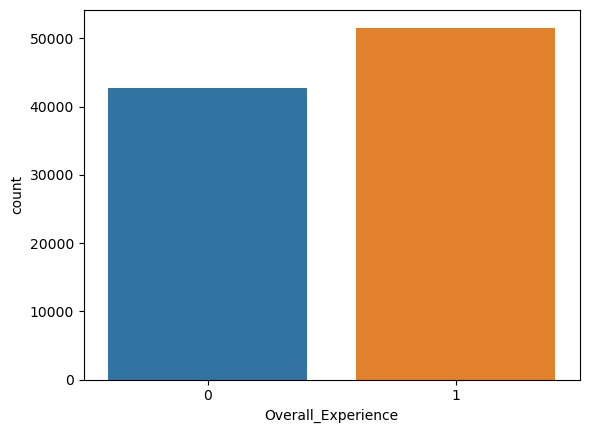

In [69]:
sns.countplot(df['Overall_Experience'])

# encoding

In [70]:
final_df

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,2,1,5.0,5,5,4,2,3,...,2,1,0,1,52.0,1,0,272,0.0,5.0
1,98800002,0,1,0,5.0,1,2,4,1,4,...,4,4,1,1,48.0,0,1,2200,9.0,0.0
2,98800003,1,2,1,2.0,2,2,2,4,5,...,5,5,0,1,43.0,1,0,1061,77.0,119.0
3,98800004,0,3,0,2.0,3,2,3,2,3,...,3,3,0,1,44.0,1,0,780,13.0,18.0
4,98800005,1,3,0,3.0,3,3,2,4,5,...,4,4,0,1,50.0,1,0,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,1,0,4.0,4,4,1,1,1,...,4,1,1,1,32.0,1,0,1357,83.0,125.0
94375,98894376,1,4,0,4.0,4,4,2,5,5,...,3,4,1,1,44.0,1,0,592,5.0,11.0
94376,98894377,1,2,1,2.0,2,2,4,5,4,...,4,3,1,1,63.0,1,0,2794,0.0,0.0
94377,98894378,0,2,0,4.0,2,4,4,2,4,...,5,4,1,1,16.0,0,1,2744,0.0,0.0


In [71]:
final_df.columns

Index(['ID', 'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')

In [73]:
final_df

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,2,1,5.0,5,5,4,2,3,...,2,1,0,1,52.0,1,0,272,0.0,5.0
1,98800002,0,1,0,5.0,1,2,4,1,4,...,4,4,1,1,48.0,0,1,2200,9.0,0.0
2,98800003,1,2,1,2.0,2,2,2,4,5,...,5,5,0,1,43.0,1,0,1061,77.0,119.0
3,98800004,0,3,0,2.0,3,2,3,2,3,...,3,3,0,1,44.0,1,0,780,13.0,18.0
4,98800005,1,3,0,3.0,3,3,2,4,5,...,4,4,0,1,50.0,1,0,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,1,0,4.0,4,4,1,1,1,...,4,1,1,1,32.0,1,0,1357,83.0,125.0
94375,98894376,1,4,0,4.0,4,4,2,5,5,...,3,4,1,1,44.0,1,0,592,5.0,11.0
94376,98894377,1,2,1,2.0,2,2,4,5,4,...,4,3,1,1,63.0,1,0,2794,0.0,0.0
94377,98894378,0,2,0,4.0,2,4,4,2,4,...,5,4,1,1,16.0,0,1,2744,0.0,0.0


In [74]:
final_df.drop(['ID'],axis=1,inplace=True)

In [75]:
final_df.drop(['DepartureDelay_in_Mins'],axis=1,inplace=True)

In [76]:
final_df.drop(['ArrivalDelay_in_Mins'],axis=1,inplace=True)

In [77]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Seat_comfort             94379 non-null  int64  
 2   Seat_Class               94379 non-null  int64  
 3   Arrival_time_convenient  94379 non-null  float64
 4   Catering                 94379 non-null  int64  
 5   Platform_location        94379 non-null  int64  
 6   Onboardwifi_service      94379 non-null  int64  
 7   Onboard_entertainment    94379 non-null  int64  
 8   Online_support           94379 non-null  int64  
 9   Onlinebooking_Ease       94379 non-null  int64  
 10  Onboard_service          94379 non-null  int64  
 11  Leg_room                 94379 non-null  int64  
 12  Baggage_handling         94379 non-null  int64  
 13  Checkin_service          94379 non-null  int64  
 14  Cleanliness           

In [78]:
X = final_df.iloc[:,1:]

In [79]:
X

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance
0,2,1,5.0,5,5,4,2,3,2,2,...,1,4,2,1,0,1,52.0,1,0,272
1,1,0,5.0,1,2,4,1,4,4,5,...,0,2,4,4,1,1,48.0,0,1,2200
2,2,1,2.0,2,2,2,4,5,5,5,...,4,4,5,5,0,1,43.0,1,0,1061
3,3,0,2.0,3,2,3,2,3,3,3,...,2,4,3,3,0,1,44.0,1,0,780
4,3,0,3.0,3,3,2,4,5,4,4,...,3,4,4,4,0,1,50.0,1,0,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,1,0,4.0,4,4,1,1,1,1,4,...,3,2,4,1,1,1,32.0,1,0,1357
94375,4,0,4.0,4,4,2,5,5,3,3,...,2,4,3,4,1,1,44.0,1,0,592
94376,2,1,2.0,2,2,4,5,4,4,4,...,3,3,4,3,1,1,63.0,1,0,2794
94377,2,0,4.0,2,4,4,2,4,4,3,...,3,4,5,4,1,1,16.0,0,1,2744


In [80]:
y = final_df.iloc[:,:1]

In [81]:
y

,Overall_Experience
0,0
1,0
2,1
3,0
4,1
...,...
94374,0
94375,1
94376,1
94377,0


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=123456)

In [84]:
X_train

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance
12660,4,0,4.0,4,4,4,4,5,4,4,...,3,4,4,3,0,1,16.0,0,1,2886
26487,5,1,4.0,4,4,3,1,3,5,5,...,4,5,5,1,0,1,53.0,1,1,503
2417,3,0,2.0,3,2,3,3,3,3,2,...,2,4,3,3,1,1,28.0,1,0,1917
28328,5,1,5.0,5,5,5,4,4,4,5,...,3,4,5,4,0,1,30.0,0,1,2738
86183,4,1,3.0,3,3,3,4,3,4,4,...,3,4,4,4,1,1,48.0,1,0,2244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41131,0,1,4.0,0,1,5,4,4,1,1,...,0,3,1,4,1,1,40.0,1,0,312
36408,5,0,5.0,3,5,5,5,5,5,5,...,4,4,5,5,0,1,37.0,0,1,1917
53746,3,0,3.0,3,5,3,3,3,3,4,...,2,5,4,3,0,0,26.0,1,1,1787
88810,1,1,0.0,0,3,1,0,1,1,4,...,1,1,2,1,0,0,26.0,1,1,2513


In [85]:
final_df.isnull().sum()

Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
dtype: int64

In [86]:
y_train

,Overall_Experience
12660,1
26487,1
2417,0
28328,1
86183,0
...,...
41131,1
36408,1
53746,0
88810,0


# LDA

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [89]:
LDA = LinearDiscriminantAnalysis()
model_LDA = LDA.fit(X_train,y_train)
model_LDA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [90]:
LDA_pred = model_LDA.predict(X_test)

In [91]:
model_LDA.score(X_test,y_test)

0.8283567713350029

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LDA_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     14189
           1       0.84      0.85      0.84     16957

    accuracy                           0.83     31146
   macro avg       0.83      0.83      0.83     31146
weighted avg       0.83      0.83      0.83     31146



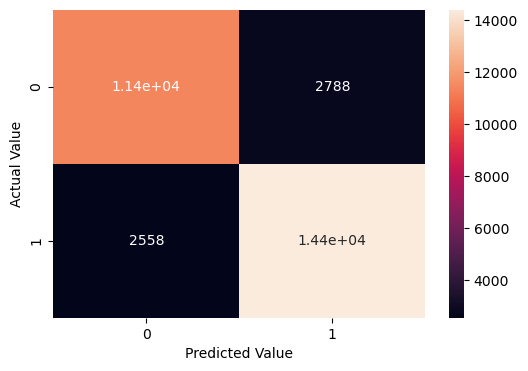

In [93]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, LDA_pred),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# LOGISTIC REGRESSION

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
from sklearn import metrics
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_predict = model_log.predict(X_test)
model_score = model_log.score(X_test, y_test)
print('model_score:', model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

model_score: 0.827907275412573
[[11419  2770]
 [ 2590 14367]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     14189
           1       0.84      0.85      0.84     16957

    accuracy                           0.83     31146
   macro avg       0.83      0.83      0.83     31146
weighted avg       0.83      0.83      0.83     31146



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
model_log.score(X_test, y_test)

0.827907275412573

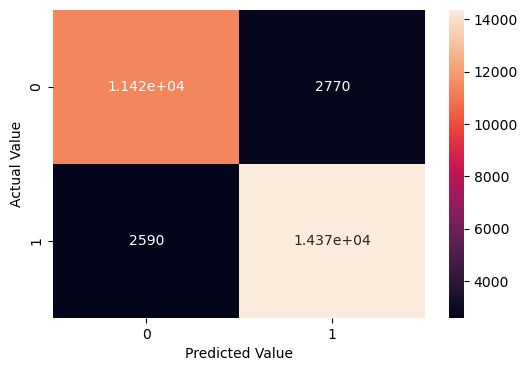

In [98]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();